In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
#import predictors of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import metrics of sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
#import cross validation
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from preprocess_data import load_data

In [8]:
# Omit warnings
import warnings
warnings.filterwarnings('ignore')

# Load data

In [9]:
database, info_dict = load_data()

# Define useful functions

In [10]:
def print_metrics(target_test, target_pred):
    print(f'accuracy: {accuracy_score(target_test, target_pred)}')
    print(f'precision: {precision_score(target_test, target_pred)}')
    print(f'recall: {recall_score(target_test, target_pred)}')
    print(f'f1: {f1_score(target_test, target_pred)}')
    print(f'roc_auc: {roc_auc_score(target_test, target_pred)}')
    print(f'confusion matrix: \n{confusion_matrix(target_test, target_pred)}')
    print('')
    
def plot_confusion_matrix(target_test, target_pred, title='Confusion matrix'):
    cm = confusion_matrix(target_test, target_pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def plot_roc_curve(target_test, target_pred, title='ROC curve'):
    fpr, tpr, thresholds = roc_curve(target_test, target_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

def train_and_test_model(model, predictors_train, target_train, predictors_test, target_test, target='Allogeneic HSCT'):
    #train the model
    model.fit(predictors_train, target_train)
    #predict the test set
    target_pred = model.predict(predictors_test)
    #compute the metrics
    print_metrics(target_test, target_pred)
    #plot the confusion matrix
    plot_confusion_matrix(target_test, target_pred, title=f'Confusion matrix for {name} - {target}')
    #plot the roc curve
    plot_roc_curve(target_test, target_pred, title=f'ROC curve for {name} - {target}')

In [11]:
#split the database in predictors and targets
predictors = database.drop(info_dict['treatments'], axis=1)
targets = database.loc[:, info_dict['treatments']]
#convert to numpy
predictors = predictors.values.astype(float)
targets = targets.values.astype(int)

models = [LogisticRegression(), RandomForestClassifier(), SVC(), MLPClassifier(), KNeighborsClassifier(), GaussianNB()]
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'MLP', 'KNN', 'Gaussian NB']



#### Allogeneic HSCT ####
number of 0: 844
number of 1: 733
percentage of 1: 0.46480659480025366

-- Logistic Regression--
accuracy: 0.9206349206349206
precision: 0.9178082191780822
recall: 0.9115646258503401
f1: 0.9146757679180887
roc_auc: 0.9200680272108844
confusion matrix: 
[[156  12]
 [ 13 134]]


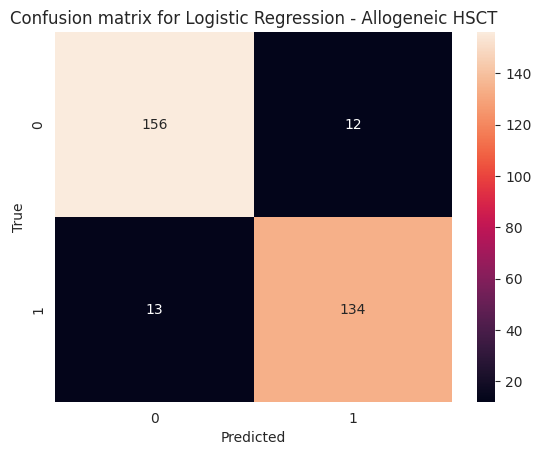

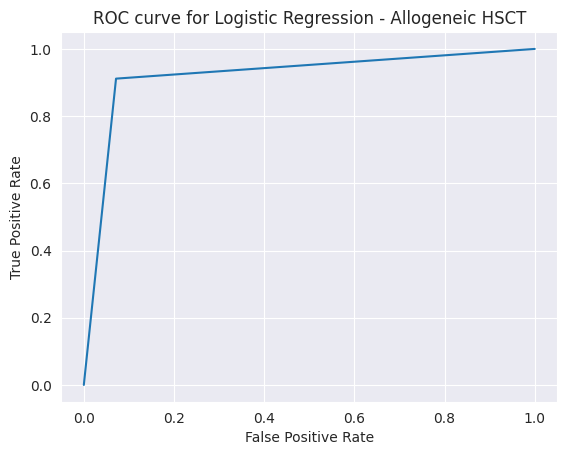


-- Random Forest--
accuracy: 0.9714285714285714
precision: 0.9423076923076923
recall: 1.0
f1: 0.9702970297029703
roc_auc: 0.9732142857142857
confusion matrix: 
[[159   9]
 [  0 147]]


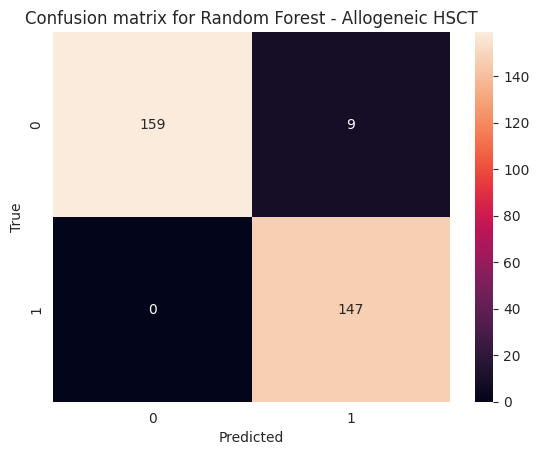

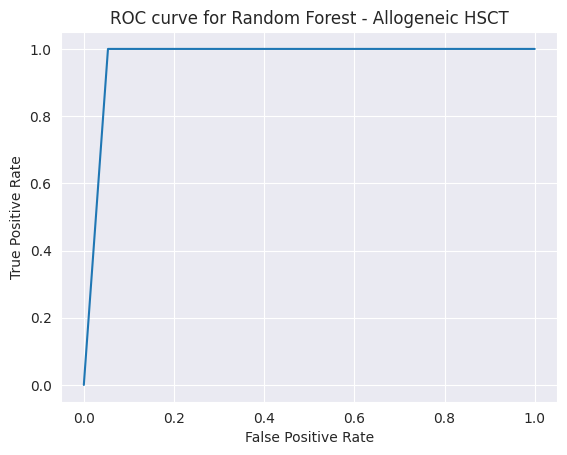


-- SVC--
accuracy: 0.8412698412698413
precision: 0.9292035398230089
recall: 0.7142857142857143
f1: 0.8076923076923077
roc_auc: 0.8333333333333334
confusion matrix: 
[[160   8]
 [ 42 105]]


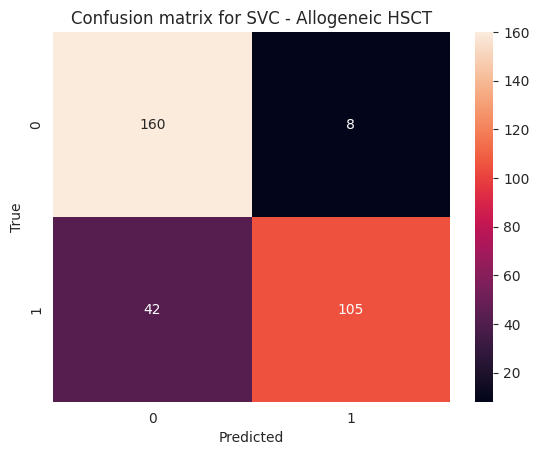

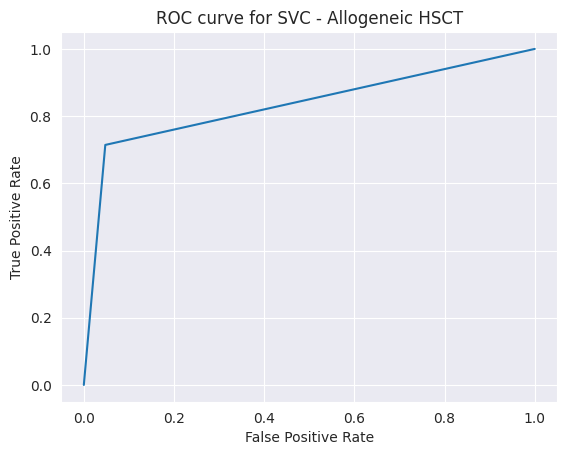


-- MLP--
accuracy: 0.8857142857142857
precision: 0.9302325581395349
recall: 0.8163265306122449
f1: 0.8695652173913043
roc_auc: 0.8813775510204082
confusion matrix: 
[[159   9]
 [ 27 120]]


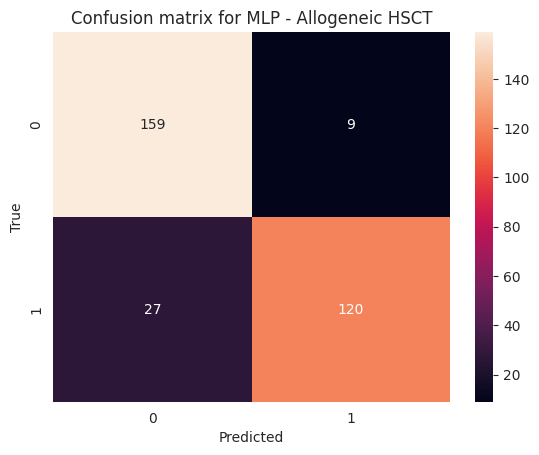

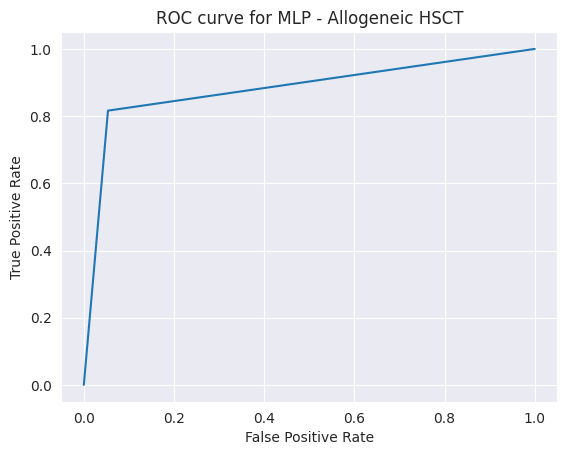


-- KNN--
accuracy: 0.8412698412698413
precision: 0.888
recall: 0.7551020408163265
f1: 0.8161764705882353
roc_auc: 0.8358843537414965
confusion matrix: 
[[154  14]
 [ 36 111]]


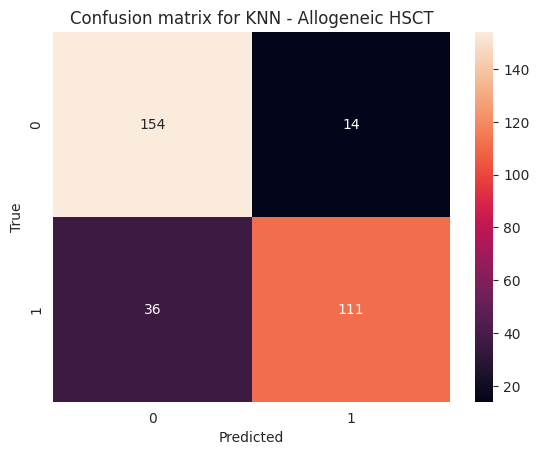

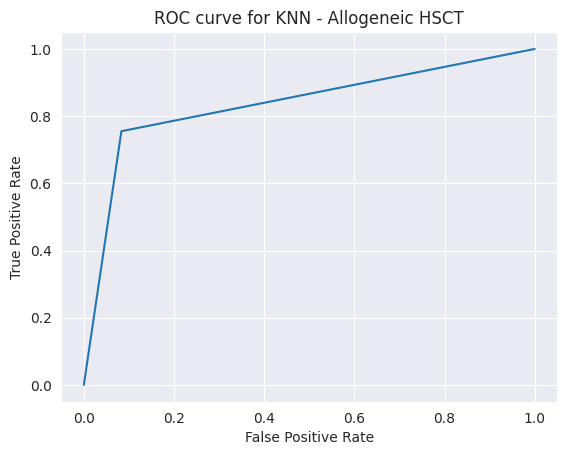


-- Gaussian NB--
accuracy: 0.7301587301587301
precision: 0.746031746031746
recall: 0.6394557823129252
f1: 0.6886446886446886
roc_auc: 0.7244897959183674
confusion matrix: 
[[136  32]
 [ 53  94]]


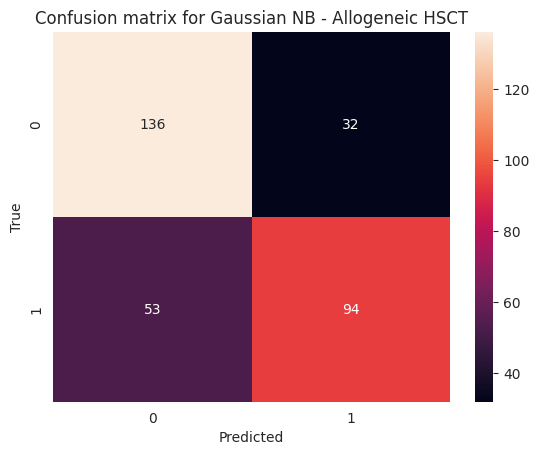

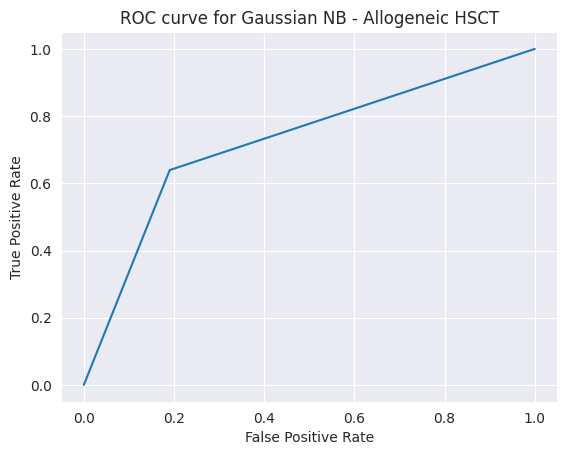



#### Autologous HSCT ####
number of 0: 1482
number of 1: 95
percentage of 1: 0.060240963855421686

-- Logistic Regression--
accuracy: 0.9365079365079365
precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.4983108108108108
confusion matrix: 
[[295   1]
 [ 19   0]]


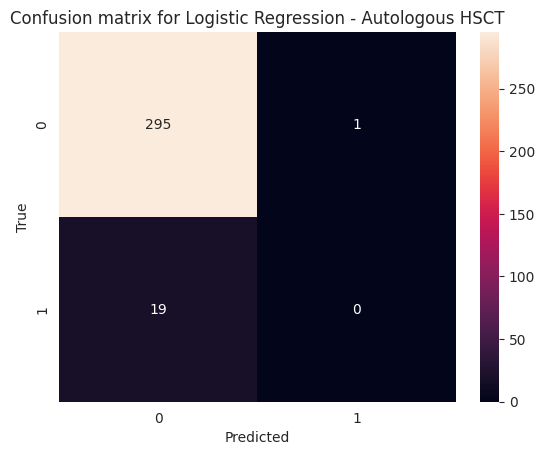

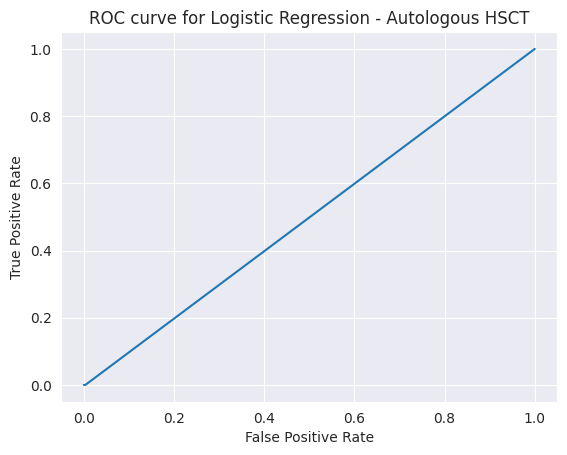


-- Random Forest--
accuracy: 0.946031746031746
precision: 1.0
recall: 0.10526315789473684
f1: 0.1904761904761905
roc_auc: 0.5526315789473684
confusion matrix: 
[[296   0]
 [ 17   2]]


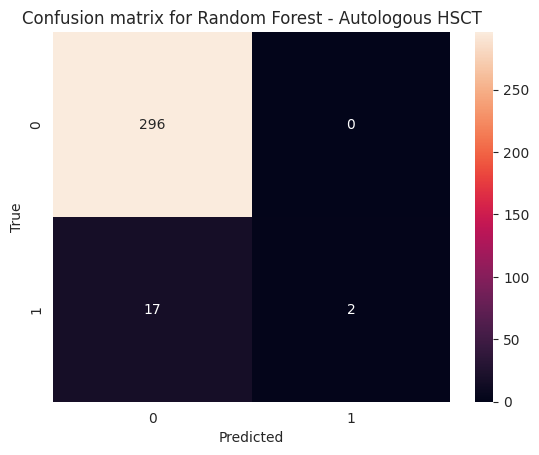

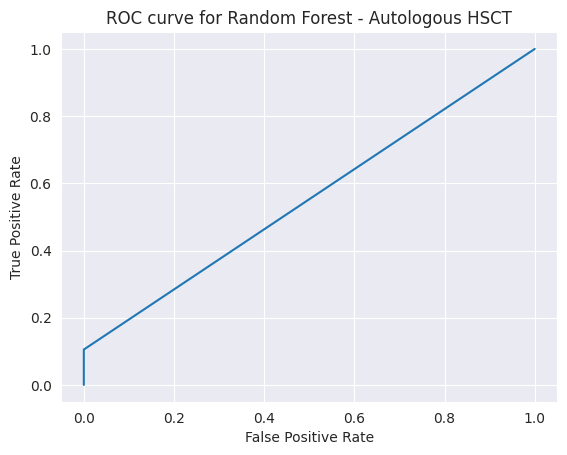


-- SVC--
accuracy: 0.9396825396825397
precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.5
confusion matrix: 
[[296   0]
 [ 19   0]]


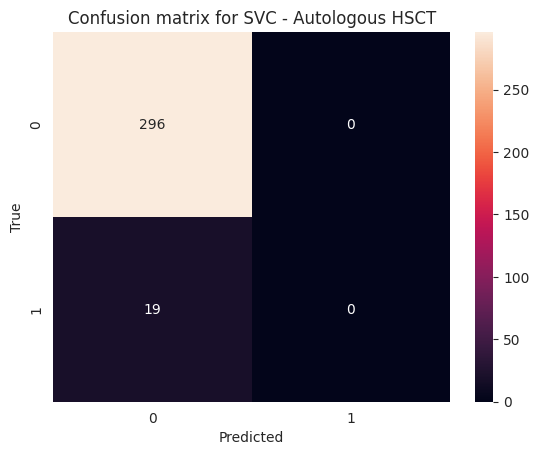

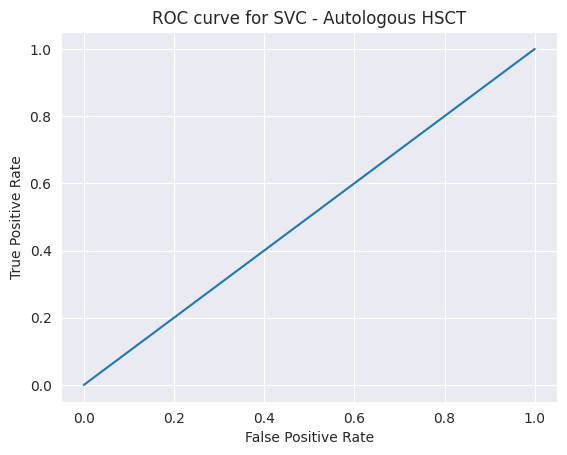


-- MLP--
accuracy: 0.8920634920634921
precision: 0.14285714285714285
recall: 0.15789473684210525
f1: 0.15
roc_auc: 0.5485419630156472
confusion matrix: 
[[278  18]
 [ 16   3]]


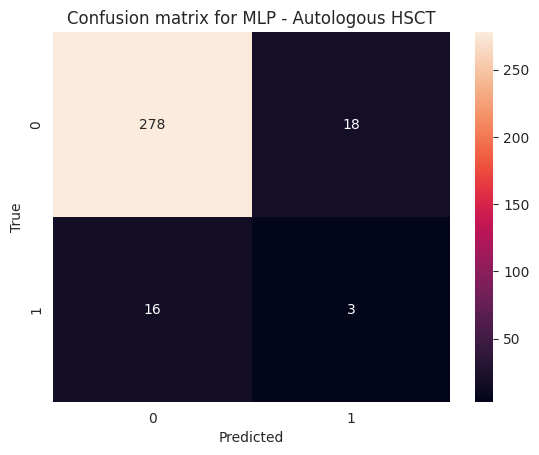

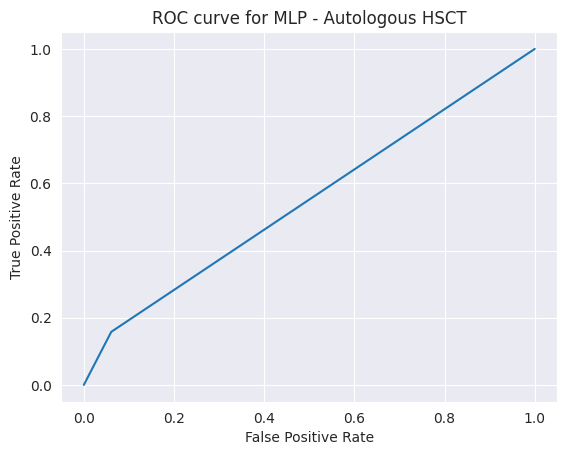


-- KNN--
accuracy: 0.9365079365079365
precision: 0.3333333333333333
recall: 0.05263157894736842
f1: 0.09090909090909091
roc_auc: 0.5229374110953058
confusion matrix: 
[[294   2]
 [ 18   1]]


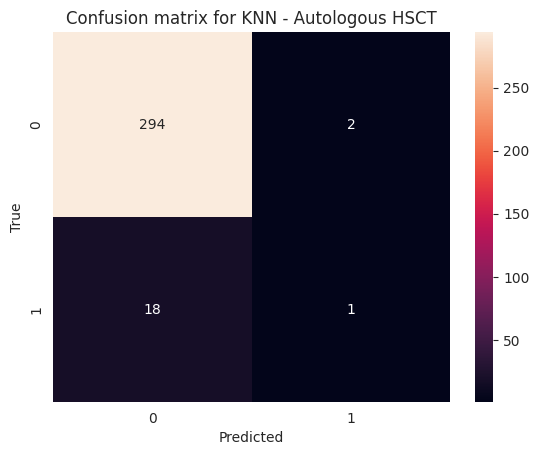

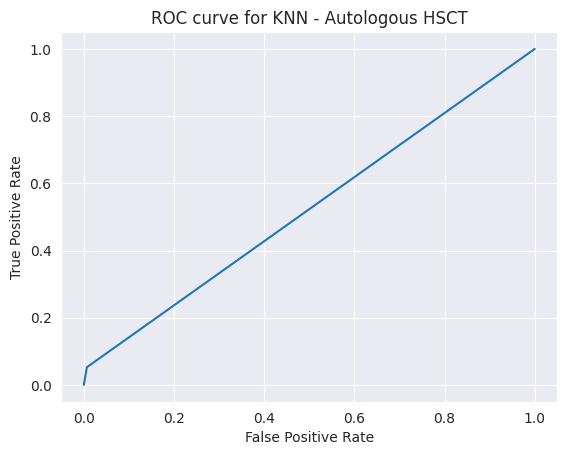


-- Gaussian NB--
accuracy: 0.7746031746031746
precision: 0.18292682926829268
recall: 0.7894736842105263
f1: 0.297029702970297
roc_auc: 0.7815611664295875
confusion matrix: 
[[229  67]
 [  4  15]]


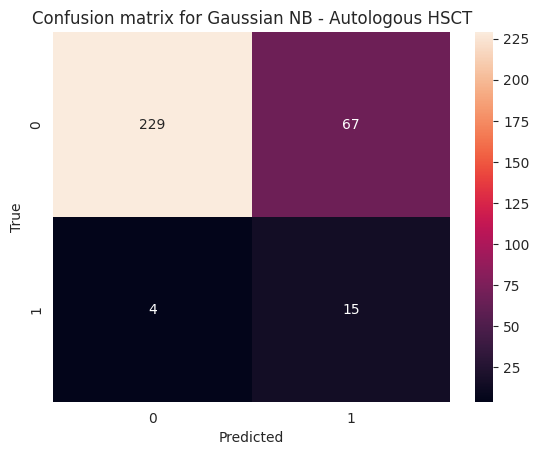

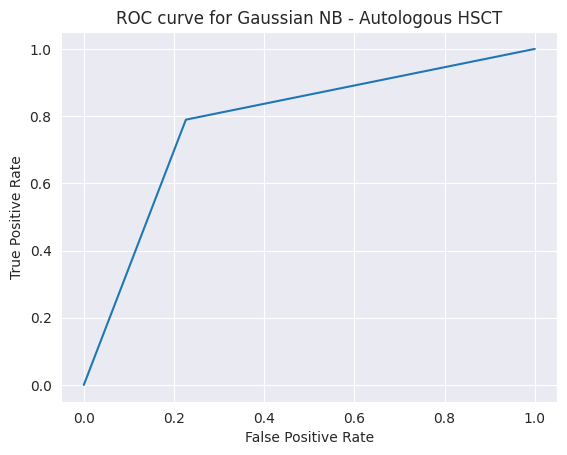

In [12]:
#train and test the models
for i, treatment in enumerate(info_dict['treatments']):
    print(f'\n\n#### {treatment} ####')
    target = targets[:, i]

    #keep only the indices where target is not null
    _predictors = predictors[~np.isnan(target)]
    _target = target[~np.isnan(target)]

    #impute 0 in _predictors where there is a nan
    _predictors = np.nan_to_num(_predictors)


    #check if target is balanced
    print(f'number of 0: {len(target[target == 0])}')
    print(f'number of 1: {len(target[target == 1])}')
    print(f'percentage of 1: {len(target[target == 1]) / len(target)}')

    #split the data in train and test
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(_predictors, _target):
        predictors_train, predictors_test = _predictors[train_index], _predictors[test_index]
        target_train, target_test = _target[train_index], _target[test_index]

    #train the model
    for model, name in zip(models, model_names):
        print(f'\n-- {name}--')
        train_and_test_model(model, predictors_train, target_train, predictors_test, target_test, target=treatment)